### Import desired libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(10,5)

Read data from csv file

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

<b>Drop features that are not required to build our model</b>

In [4]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
df.isnull().sum()/df.shape[0]*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

<B>Above statastics shows <i>'society'</i> column contains 41.30% missing values. So, it is better to drop <i>'society'</i> column.</B>

In [6]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

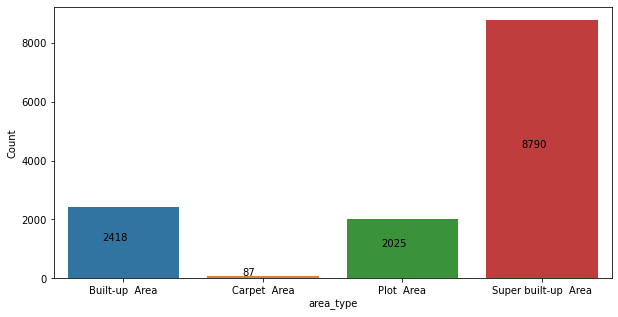

In [7]:
df_area_type_group =df.groupby('area_type')['area_type'].agg(Count='count')
plt.figure(figsize=(10,5))
area_type_plot = sns.barplot(x = df_area_type_group.index, y = df_area_type_group['Count'])
for i in area_type_plot.patches:
    area_type_plot.annotate(int(i.get_height()), (i.get_x()+0.25, i.get_height()/2), va = 'bottom', color='black')

In [8]:
df.balcony.unique()

array([ 1.,  3., nan,  2.,  0.])

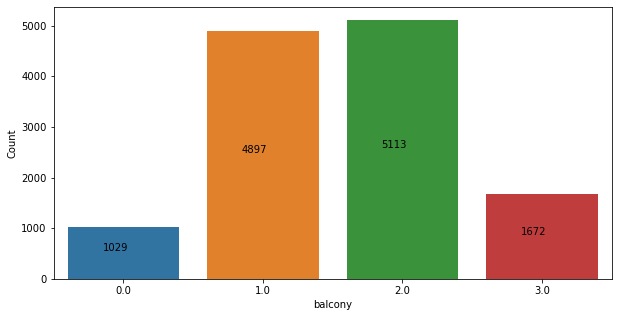

In [9]:
df_balcony_group = df.groupby('balcony')['balcony'].agg(Count='count')
plt.figure(figsize=(10,5))
balcony_plot = sns.barplot(x = df_balcony_group.index, y = df_balcony_group['Count'])
for i in balcony_plot.patches:
    balcony_plot.annotate(int(i.get_height()), (i.get_x()+0.25, i.get_height()/2), va = 'bottom', color='black')

<b><i>'balcony'</i> column contains 4.57% missing values and these are missing completely at random. Hence, we can drop <i>'balcony'</i> column<i>'availabilty'</i> column is not required for the prediction of price of house, so it can be dropped.</b>

In [10]:
df = df.drop(['area_type','balcony','availability','society'],axis='columns')
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [11]:
# df.to_excel("pre_total_sqft.xlsx")
df[50:60]

,location,size,total_sqft,bath,price
50,Adarsh Nagar,2 BHK,1270,2.0,50.0
51,Bhoganhalli,3 BHK,1670,3.0,99.0
52,Whitefield,3 BHK,2010,3.0,91.0
53,Lakshminarayana Pura,2 BHK,1185,2.0,75.0
54,Yelahanka,3 BHK,1600,2.0,75.0
55,Begur Road,2 BHK,1200,2.0,44.0
56,Devanahalli,4 Bedroom,3010 - 3410,NaN,192.0
57,Ramakrishnappa Layout,2 BHK,1500,2.0,185.0
58,Murugeshpalya,6 Bedroom,1407,4.0,150.0
59,Govindaraja Nagar Ward,2 BHK,840,2.0,45.0


<b>Data Cleaning: Handling missing values</b>

<AxesSubplot:>

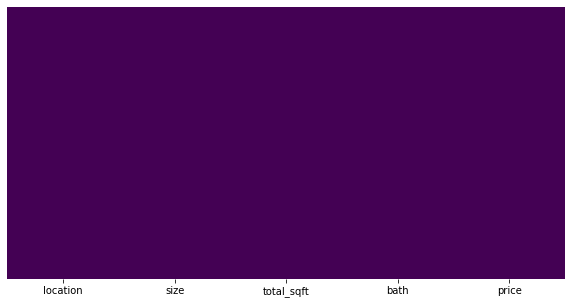

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [14]:
df.isnull().sum()*100/df.shape[0]

location      0.007508
size          0.120120
total_sqft    0.000000
bath          0.548048
price         0.000000
dtype: float64

<AxesSubplot:xlabel='bath', ylabel='Count'>

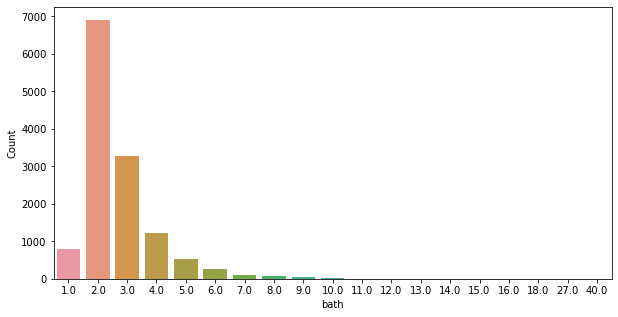

In [15]:
df_bath_group = df.groupby('bath')['bath'].agg(Count='count')
plt.figure(figsize=(10,5))
sns.barplot(x=df_bath_group.index, y = df_bath_group.Count)

1. <b>As <i>'bath'</i> column is of type missing completely at random(MCAR), it is better to drop null values present in this column.
2. <i>'location'</i> and <i>'size'</i>columns contain very less missing values. So, even if we drop these null values from dataset, it will not affect much.</b>

In [16]:
df = df.dropna()
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [17]:
df.shape
df[50:60]

,location,size,total_sqft,bath,price
50,Adarsh Nagar,2 BHK,1270,2.0,50.0
51,Bhoganhalli,3 BHK,1670,3.0,99.0
52,Whitefield,3 BHK,2010,3.0,91.0
53,Lakshminarayana Pura,2 BHK,1185,2.0,75.0
54,Yelahanka,3 BHK,1600,2.0,75.0
55,Begur Road,2 BHK,1200,2.0,44.0
57,Ramakrishnappa Layout,2 BHK,1500,2.0,185.0
58,Murugeshpalya,6 Bedroom,1407,4.0,150.0
59,Govindaraja Nagar Ward,2 BHK,840,2.0,45.0
60,Tharabanahalli,3 Bedroom,4395,3.0,240.0


### Feature Engineerng: Data wrangling

In size column, value is in string format like '3 BHK', so we have remove alphabets and just retreive integer values.

In [18]:
import re
df['size'] = df['size'].str.replace(r'\D+', '').astype(int)

<ipython-input-18-1816af480d06>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['size'] = df['size'].str.replace(r'\D+', '').astype(int)
<ipython-input-18-1816af480d06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size'] = df['size'].str.replace(r'\D+', '').astype(int)


In [19]:
df['size'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

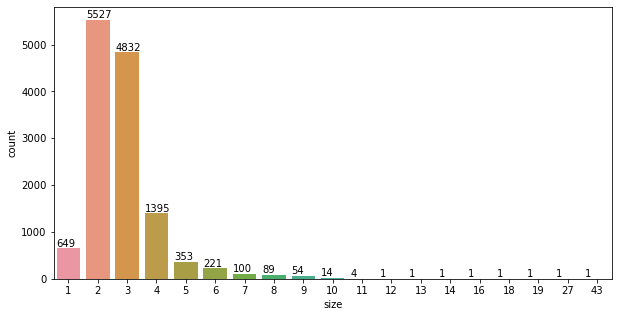

In [20]:
size_plot = sns.countplot(x = 'size',data = df)
for i in size_plot.patches:
    size_plot.annotate(int(i.get_height()),(i.get_x(), i.get_height()+1),va = 'bottom', color='black')

In [21]:
df.info()
df[50:60]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  int32  
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
dtypes: float64(2), int32(1), object(2)
memory usage: 1.1+ MB


,location,size,total_sqft,bath,price
50,Adarsh Nagar,2,1270,2.0,50.0
51,Bhoganhalli,3,1670,3.0,99.0
52,Whitefield,3,2010,3.0,91.0
53,Lakshminarayana Pura,2,1185,2.0,75.0
54,Yelahanka,3,1600,2.0,75.0
55,Begur Road,2,1200,2.0,44.0
57,Ramakrishnappa Layout,2,1500,2.0,185.0
58,Murugeshpalya,6,1407,4.0,150.0
59,Govindaraja Nagar Ward,2,840,2.0,45.0
60,Tharabanahalli,3,4395,3.0,240.0


In [22]:
# temp =df[df['total_sqft'].str.contains(r'[0-9]+[a-zA-Z]+') | df['total_sqft'].str.contains('\d+ - \d+')]
temp =df[df['total_sqft'].str.contains(r'[0-9]+[a-zA-Z]+') | df['total_sqft'].str.contains('[0-9]+ - [0-9]+')]
temp.head(10)

,location,size,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
122,Hebbal,4,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,43.490
188,KR Puram,2,1015 - 1540,2.0,56.800
410,Kengeri,1,34.46Sq. Meter,1.0,18.500
549,Hennur Road,2,1195 - 1440,2.0,63.770
648,Arekere,9,4125Perch,9.0,265.000
661,Yelahanka,2,1120 - 1145,2.0,48.130
672,Bettahalsoor,4,3090 - 5002,4.0,445.000


<b>If we analyze above table, we found <i>total_sqft</i> column contains values in various formats and should be converted in Sqft. Following are various patterns:
- 1015 \- 1540: We will take average of such values,
- 36.64Sq. Meter: 1 Sq. Meter * 10.7639 = 10.7639Sqft
- 2132Perch : 1 Perch * 272.25 = 272.25 Sqft
- 1234Sq. Yards: 1Sq. Yards*9 = 1 sqft
- Acres: 1 Acre * 43560 = 43560sqft
- Cents: 1 Cent * 435.5 = 435.5sqft
- Guntha: 1 Guntha * 1089 = 1089sqft
- Grounds: 1 Grounds*2400 = 2400sqft

    <i>convert_to_sqft()</i> function will calculate average of <i>total_sqfit</i> range values.</b>

In [23]:
import re
def convert_to_sqft(str):
    tokens=str.split(' - ')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2 
    elif len(tokens)==1:
        if 'Sq. Meter' in tokens[0]:
            tokens[0] = re.sub(r'\D+.\D+', '',tokens[0])
            return (float(tokens[0])*10.7639)
        elif 'Perch' in tokens[0]:
            tokens[0] = re.sub(r'\D+.\D+', '',tokens[0])
            return (float(tokens[0])*272.25)
        elif 'Sq. Yards' in tokens[0]:
            tokens[0] = re.sub(r'\D+.\D+', '',tokens[0])
            return (float(tokens[0])*9)
        elif 'Acres' in tokens[0]:
            tokens[0] = re.sub(r'\D+.\D+', '',tokens[0])
            return (float(tokens[0])*43560)
        elif 'Cents' in tokens[0]:
            tokens[0] = re.sub(r'\D+.\D+', '',tokens[0])
            return (float(tokens[0])*435.5)
        elif 'Guntha' in tokens[0]:
            tokens[0] = re.sub(r'\D+.\D+', '',tokens[0])
            return (float(tokens[0])*1089)
        elif 'Grounds' in tokens[0]:
            tokens[0] = re.sub(r'\D+.\D+', '',tokens[0])
            return (float(tokens[0])*2400)
        else:
            return float(tokens[0])
    else:
        return None

Apply <i>convert_to_sqft()</i> function should be applied in <i>'total_sqft'</i>.

In [24]:
df['total_sqft'] = df['total_sqft'].apply(convert_to_sqft)
df

<ipython-input-24-9faa6932990b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sqft'] = df['total_sqft'].apply(convert_to_sqft)


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00
13316,Richards Town,4,3600.0,5.0,400.00
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00
13318,Padmanabhanagar,4,4689.0,4.0,488.00


In [25]:
df.to_excel("total_sqft.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  int32  
 2   total_sqft  13246 non-null  float64
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
dtypes: float64(3), int32(1), object(1)
memory usage: 1.1+ MB


### Feature Engineering
Add new feature <i>'Price_per_sqft' column</i>.

In [26]:
df['Price_per_sqft'] = df['price']*100000/df['total_sqft']
df

<ipython-input-26-43c9e00dfde2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price_per_sqft'] = df['price']*100000/df['total_sqft']


,location,size,total_sqft,bath,price,Price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00,6689.834926
13316,Richards Town,4,3600.0,5.0,400.00,11111.111111
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00,5258.545136
13318,Padmanabhanagar,4,4689.0,4.0,488.00,10407.336319


In [27]:
df['Price_per_sqft'].describe()

count    1.324600e+04
mean     7.915283e+03
std      1.065452e+05
min      2.257423e+00
25%      4.262295e+03
50%      5.433101e+03
75%      7.317073e+03
max      1.200000e+07
Name: Price_per_sqft, dtype: float64

<AxesSubplot:xlabel='Price_per_sqft', ylabel='Density'>

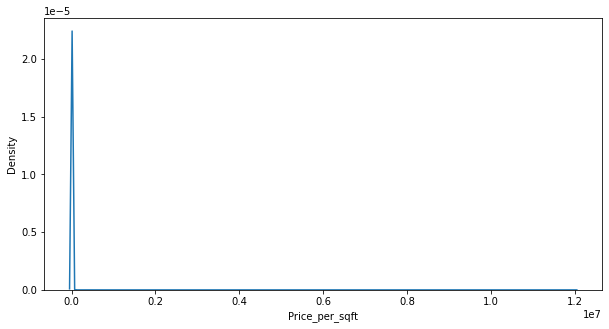

In [28]:
sns.kdeplot(df['Price_per_sqft'])

### Dimensionality Reduction
<b>Examine location feature and check dimensionality. If there are more number of rows, we have to apply dimensionality detection techniques(Reducing the number of rows)</b>

In [29]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

<AxesSubplot:xlabel='location', ylabel='Count'>

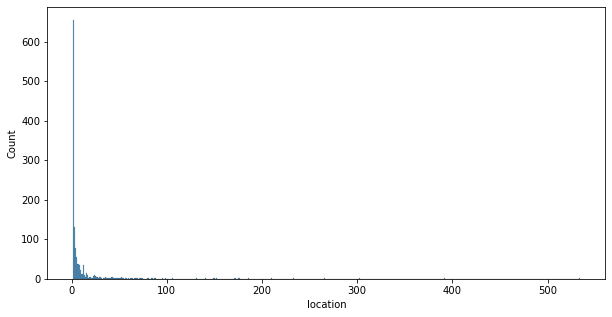

In [30]:
plt.figure(figsize=(10,5))
location_statatistics = df.groupby('location')['location'].agg('value_counts').sort_values(ascending=False)
sns.histplot(location_statatistics)

In [31]:
location_statatistics.unique()

array([534, 392, 302, 266, 233, 210, 186, 176, 175, 171, 152, 150, 149,
       141, 131, 106,  98,  96,  88,  87,  85,  84,  81,  79,  74,  73,
        72,  70,  68,  67,  66,  64,  63,  62,  60,  57,  56,  54,  53,
        52,  51,  50,  49,  48,  47,  46,  45,  44,  43,  42,  41,  40,
        39,  38,  37,  36,  35,  34,  33,  31,  30,  29,  28,  27,  26,
        25,  24,  23,  22,  21,  20,  19,  18,  17,  16,  15,  14,  13,
        12,  11,  10,   9,   8,   7,   6,   5,   4,   3,   2,   1],
      dtype=int64)

In [32]:
location_statatistics_less_than_10 = location_statatistics[location_statatistics<=10]
location_statatistics_less_than_10

location               location             
Dodsworth Layout       Dodsworth Layout         10
1st Block Koramangala  1st Block Koramangala    10
Nagappa Reddy Layout   Nagappa Reddy Layout     10
Ganga Nagar            Ganga Nagar              10
Dairy Circle           Dairy Circle             10
                                                ..
 Banaswadi              Banaswadi                1
Kanakadasa Layout      Kanakadasa Layout         1
Kanakapur main road    Kanakapur main road       1
Kanakapura  Rod        Kanakapura  Rod           1
whitefiled             whitefiled                1
Name: location, Length: 1063, dtype: int64

<b>If location count is less than 10, then that particular location should be replaced by 'other' string.</b>

In [33]:
df.location =df.location.apply(lambda x: 'other' if x in location_statatistics_less_than_10 else x)
len(df.location.unique())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


242

In [34]:
df.shape

(13246, 6)

In [35]:
df.groupby('location')['location'].agg('value_counts').sort_values(ascending=False)

location                   location                 
other                      other                        2896
Whitefield                 Whitefield                    534
Sarjapur  Road             Sarjapur  Road                392
Electronic City            Electronic City               302
Kanakpura Road             Kanakpura Road                266
                                                        ... 
HAL 2nd Stage              HAL 2nd Stage                  11
Nehru Nagar                Nehru Nagar                    11
Kodigehalli                Kodigehalli                    11
2nd Phase Judicial Layout  2nd Phase Judicial Layout      11
Pattandur Agrahara         Pattandur Agrahara             11
Name: location, Length: 242, dtype: int64

### Handling Outliers
<b>As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft.</b>

In [36]:
df = df[~((df['total_sqft']/df['size'])<300)]
df

,location,size,total_sqft,bath,price,Price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00,6689.834926
13316,other,4,3600.0,5.0,400.00,11111.111111
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00,5258.545136
13318,Padmanabhanagar,4,4689.0,4.0,488.00,10407.336319


## Outlier Removal Using Standard Deviation and Mean

In [37]:
df.Price_per_sqft.describe()

count     12498.000000
mean       6298.898076
std        4169.130144
min           2.257423
25%        4203.458878
50%        5291.005291
75%        6916.666667
max      176470.588235
Name: Price_per_sqft, dtype: float64

<b>Here, we find that min price per sqft is 2.25 rs/sqft, which is very less. If you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally minimum per square ft price is at least 250 rs/sqft. So, we will exclude data points which contain per sqft price less than 250 rs/sqft.</b>

In [38]:
df = df[df['Price_per_sqft']>=250]

In [39]:
df['Price_per_sqft'].describe()

count     12489.000000
mean       6303.375420
std        4167.292619
min         267.829813
25%        4206.418040
50%        5292.633015
75%        6919.642857
max      176470.588235
Name: Price_per_sqft, dtype: float64

<b>From above statistics, we find that min price per sqft is 219.68 rs/sqft and max price per sqft is 176470rs/sqft, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation.</b>

In [40]:
def remove_outliers_per_location(df):
    df_out = pd.DataFrame()
    for key, per_location_df in df.groupby('location'):
        upper_limit = np.mean(per_location_df['Price_per_sqft']) + np.std(per_location_df['Price_per_sqft'])
        lower_limit = np.mean(per_location_df['Price_per_sqft']) - np.std(per_location_df['Price_per_sqft'])
        reduced_df = per_location_df[(per_location_df.Price_per_sqft>lower_limit) & (per_location_df.Price_per_sqft<=upper_limit)]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_outliers_per_location(df)
df.shape

(10269, 6)

In [41]:
df['Price_per_sqft'].describe()

count    10269.000000
mean      5658.131332
std       2265.413067
min        876.795163
25%       4244.762955
50%       5175.159236
75%       6428.571429
max      24509.803922
Name: Price_per_sqft, dtype: float64

<b>Let's check prices of flats having same sqft area having less number of bedrooms, but have more price than the flats having more number of bedrooms in same location. If such samples are present in dataset, then these are outliers and should be removed from dataset.</b>
Following is the analysis of location <b><i>Raja Rajeshwari Nagar</i></b>. We have plotted a scatter plot from which we can easily understand whether outliers are present or not.

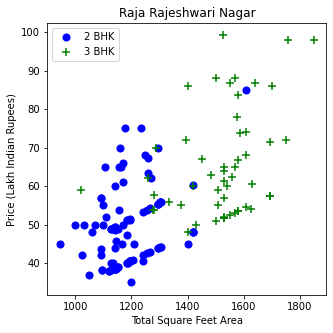

In [42]:
def scatter_plot(df,location):
    bhk2 = df[(df['location']==location) & (df['size'] == 2)]
    bhk3 = df[(df['location']==location) & (df['size'] == 3)]
    matplotlib.rcParams['figure.figsize']=(5,5)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
scatter_plot(df,'Raja Rajeshwari Nagar')

If we analyze above scatter plot, we say that there are few samples having same total sqft area but less number of bedrooms and more price than the other one having more number bedrooms.

To remove outliers, we will build a dictionary containing statastics per bhk i.e.

{

    '1' : {
        'mean': 6485.843278998773,
        'std: 11248.767983981796,
        'count': 649
    },
    '2' : {
        'mean': 5175.857042073552,
        'std: 2076.3946380067705,
        'count': 5527
    },    
}

In [43]:
def remove_greater_price_outliers(df):
    exclude_indices =np.array([])
    for location, location_df in df.groupby('location'):
        bhk_statastics = {}
        for bhk, bhk_df in location_df.groupby('size'):
            bhk_statastics[bhk] = {
                'mean' : np.mean(bhk_df['Price_per_sqft']),
                'std': np.std(bhk_df['Price_per_sqft']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('size'):
            prev_bhk_statastics = bhk_statastics.get(bhk-1)
            if prev_bhk_statastics and prev_bhk_statastics['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[(bhk_df['Price_per_sqft'])<(prev_bhk_statastics['mean'])].index.values)
                
    return df.drop(exclude_indices,axis='index')
df = remove_greater_price_outliers(df)

In [44]:
df.shape

(7353, 6)

<b>Now, let us analyze location <i>''</i> after removing outliers. </b>

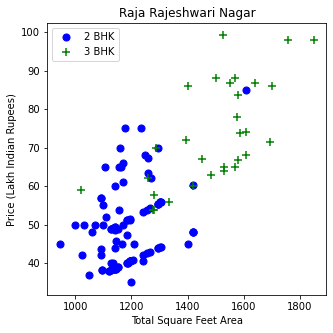

In [45]:
scatter_plot(df,'Raja Rajeshwari Nagar')

<b>Before and after removal outliers : Raja Rajeshwari Nagar</b>
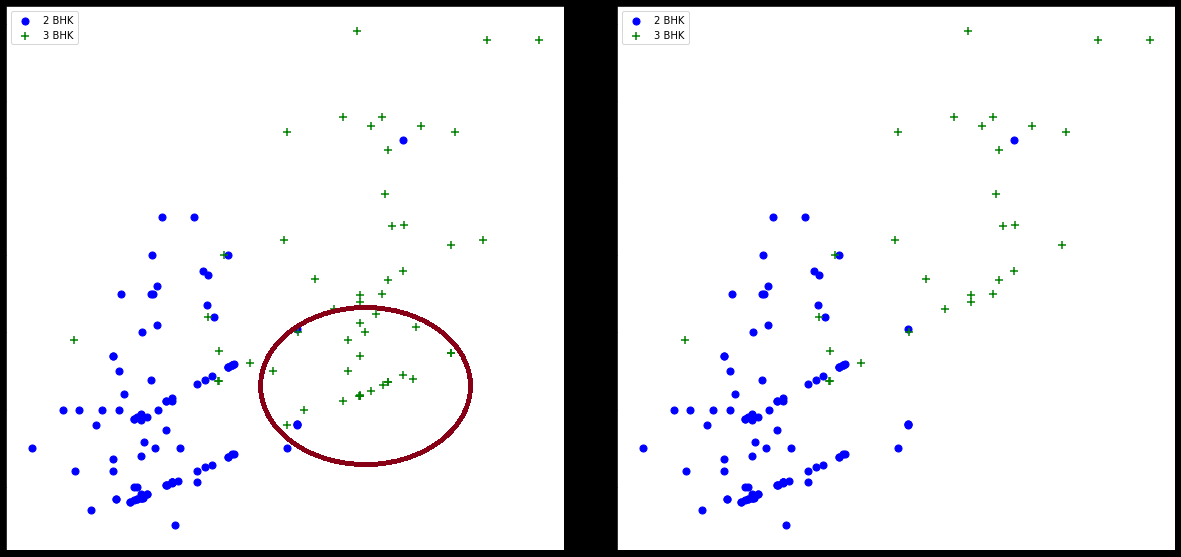

<AxesSubplot:xlabel='Price_per_sqft', ylabel='Density'>

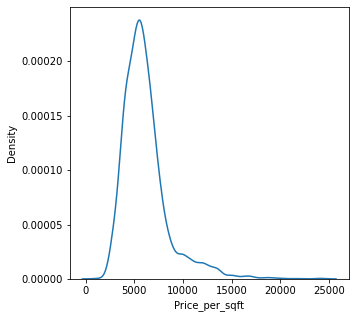

In [46]:
matplotlib.rcParams['figure.figsize']=(5,5)
sns.kdeplot(df['Price_per_sqft'])

### Outlier removal based on number of bedrooms feature

In [47]:
df.bath.unique()

array([ 2.,  3.,  4.,  5.,  1.,  8.,  6.,  7.,  9., 12., 16., 13.])

<b>Again the business manager has a conversation with you (i.e. a data scientist) that if you have <i>x</i> bedroom home, then you will have total bath = total bed + 1 maximum bathrooms in home. Anything above that is an outlier or a data error and can be removed.</b>

In [48]:
df[df['size']+1<df['bath']]

,location,size,total_sqft,bath,price,Price_per_sqft
50,2nd Stage Nagarbhavi,6,3000.0,8.0,451.0,15033.333333
51,2nd Stage Nagarbhavi,6,2400.0,8.0,450.0,18750.000000
544,Arekere,4,2710.0,6.0,142.0,5239.852399
594,BTM 2nd Stage,3,1260.0,5.0,185.0,14682.539683
826,Bannerghatta,4,3012.0,6.0,250.0,8300.132802
...,...,...,...,...,...,...
9942,other,4,6652.0,6.0,510.0,7666.867108
10063,other,2,600.0,4.0,70.0,11666.666667
10116,other,3,5656.0,5.0,499.0,8822.489392
10230,other,4,6652.0,6.0,660.0,9921.828022


<b>Above records are outliers</b>

In [49]:
df = df[df['size']+1>=df['bath']]
df = df.drop(['Price_per_sqft'], axis='columns')
df.head(5)

,location,size,total_sqft,bath,price
1,Devarachikkanahalli,2,1250.0,2.0,40.0
2,Devarachikkanahalli,2,1200.0,2.0,83.0
3,Devarachikkanahalli,2,1170.0,2.0,40.0
4,Devarachikkanahalli,3,1425.0,2.0,65.0
5,Devarachikkanahalli,2,947.0,2.0,43.0


In [50]:
df.shape

(7275, 5)

<b>1. Check Linearity of all independent features.</b>

<AxesSubplot:xlabel='size', ylabel='price'>

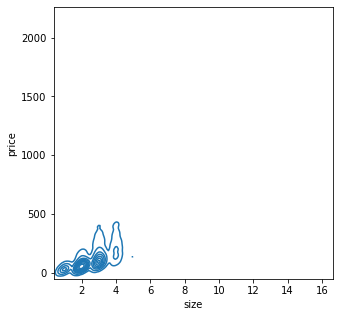

In [51]:
sns.kdeplot(x='size',y='price', data=df)

<AxesSubplot:xlabel='bath', ylabel='price'>

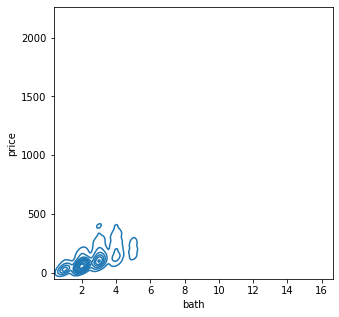

In [52]:
sns.kdeplot(x='bath',y='price', data=df)

<AxesSubplot:xlabel='total_sqft', ylabel='price'>

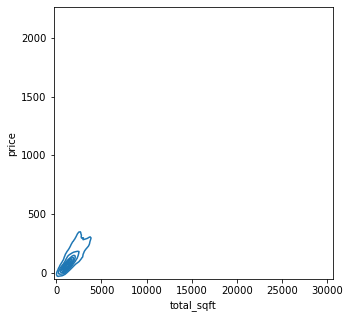

In [53]:
sns.kdeplot(x='total_sqft',y='price', data=df)

## Onehot encoding of categorical feature: <i>Location</i>

In [54]:
df_onehot = pd.get_dummies(df['location'])
df_onehot

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
df_merge = pd.concat([df,df_onehot.drop('other',axis='columns')],axis='columns') 
df_merge

,location,size,total_sqft,bath,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,2,1250.0,2.0,40.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,2,1200.0,2.0,83.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,2,1170.0,2.0,40.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,3,1425.0,2.0,65.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,2,947.0,2.0,43.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10260,other,2,1200.0,2.0,70.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10261,other,1,1800.0,1.0,200.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10264,other,2,1353.0,2.0,110.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10265,other,1,812.0,1.0,26.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df1 = df_merge.drop('location',axis='columns')
df1

,size,total_sqft,bath,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,2,1250.0,2.0,40.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1200.0,2.0,83.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1170.0,2.0,40.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1425.0,2.0,65.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,947.0,2.0,43.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10260,2,1200.0,2.0,70.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10261,1,1800.0,1.0,200.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10264,2,1353.0,2.0,110.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10265,1,812.0,1.0,26.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df_merge = df_merge.drop(['location'],axis='columns')
df_merge.shape

(7275, 245)

In [58]:
df_merge

,size,total_sqft,bath,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,2,1250.0,2.0,40.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1200.0,2.0,83.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1170.0,2.0,40.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1425.0,2.0,65.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,947.0,2.0,43.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10260,2,1200.0,2.0,70.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10261,1,1800.0,1.0,200.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10264,2,1353.0,2.0,110.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10265,1,812.0,1.0,26.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Build a model to predict a price

In [59]:
X = df_merge.drop(['price'], axis = 'columns')
Y = df_merge['price']
print(X.shape)
print(Y.shape)

(7275, 244)
(7275,)


In [60]:
X

,size,total_sqft,bath,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,2,1250.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1200.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1170.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1425.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,947.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10260,2,1200.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10261,1,1800.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10264,2,1353.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10265,1,812.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
Y

1         40.0
2         83.0
3         40.0
4         65.0
5         43.0
         ...  
10260     70.0
10261    200.0
10264    110.0
10265     26.0
10268    400.0
Name: price, Length: 7275, dtype: float64

<b>Split dataset into training and testing dataset</b>

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state = 10)
X_train

,size,total_sqft,bath,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
7448,4,2850.0,5.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5764,3,2500.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399,3,1935.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4667,2,1027.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3186,2,1240.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406,2,1200.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4282,2,1147.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1612,2,1000.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5712,2,1196.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

0.8581978138034279

In [64]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.55647192, 0.83822408, 0.83975658, 0.84768257, 0.80512477])

## Find the best model using machine learning
<b>We will analyze the performance of decision tree regressor, random forest regressor and Support vector machine regressor.
    </b>

In [65]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

def find_bestmodel_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'randomforest': {
            'model': RandomForestRegressor(),
            'params': {'n_estimators':[100]}
        },
        'SVR_rbf':{
            'model' : SVR(),
            'params' : {
                'kernel':['rbf'], 
                'C':[100],
                'gamma':[0.1], 
                'epsilon':[0.1]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_bestmodel_using_gridsearchcv(X,Y)

,model,best_score,best_params
0,linear_regression,0.777452,{'normalize': True}
1,lasso,0.640810,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.648844,"{'criterion': 'mse', 'splitter': 'random'}"
3,randomforest,0.754779,{'n_estimators': 100}
4,SVR_rbf,0.559519,"{'C': 100, 'epsilon': 0.1, 'gamma': 0.1, 'kern..."


<b>From above analysis, we can say that linear regressor model gives better performance.</b>

### Test the random forest regressor model for few samples

In [75]:
lr_model = LinearRegression()
lr_model.fit(X_train,Y_train)
lr_model.score(X_test,Y_test)

0.8581978138034279

In [67]:
def predict_price(location,bhk,total_sqft,bath):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bhk
    x[1] = total_sqft
    x[2] = bath
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_model.predict([x])[0]

In [74]:
predict_price('1st Phase JP Nagar', 2,1180, 2)

92.60803936036977

In [69]:
predict_price('1st Phase JP Nagar', 3,2180, 3)

168.78434032903215

In [73]:
predict_price('Indira Nagar', 3,1700, 3)

237.10719401854482

In [72]:
predict_price('Indira Nagar', 4, 1000, 4)

211.60894935477978